In [1]:
#IMPORT ALL NEEDED LIBRARIES
import pandas as pd
from os import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import KNN
from geopy.distance import geodesic
from geopy.distance import great_circle
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
#IMPORT CSV FILE AND CONVERT THE REQUIRED DATA TYPES
getcwd()
train_cab=pd.read_csv('C:\\Users\\My guest\\Desktop\\cab project\\train_cab.csv')
test_cab = pd.read_csv('C:\\Users\\My guest\\Desktop\\cab project\\test.csv')

In [4]:
#GET THE FEEL OF THE DATA
train_cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
train_cab.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [6]:
train_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [7]:
#Converting data types
data=[train_cab,test_cab]
train_cab['fare_amount']  = pd.to_numeric(train_cab['fare_amount'],errors='coerce')
for i in data:
    i['pickup_datetime']  = pd.to_datetime(i['pickup_datetime'],errors='coerce')
  
    

In [8]:
train_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16042 non-null float64
pickup_datetime      16066 non-null datetime64[ns, UTC]
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 878.7 KB


In [9]:
test_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null datetime64[ns, UTC]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 464.8 KB


In [10]:
test_cab.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [11]:
test_cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1


In [12]:
test_cab.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
dtype: int64

In [13]:
train_cab.nunique()

fare_amount            467
pickup_datetime      16020
pickup_longitude     13789
pickup_latitude      14241
dropoff_longitude    13887
dropoff_latitude     14263
passenger_count         27
dtype: int64

# Graphical EDA - Data Visualization

In [14]:
# setting up the sns for plots
sns.set(style='darkgrid',palette='Set2')

C:\Users\My guest\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\My guest\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\My guest\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\My guest\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


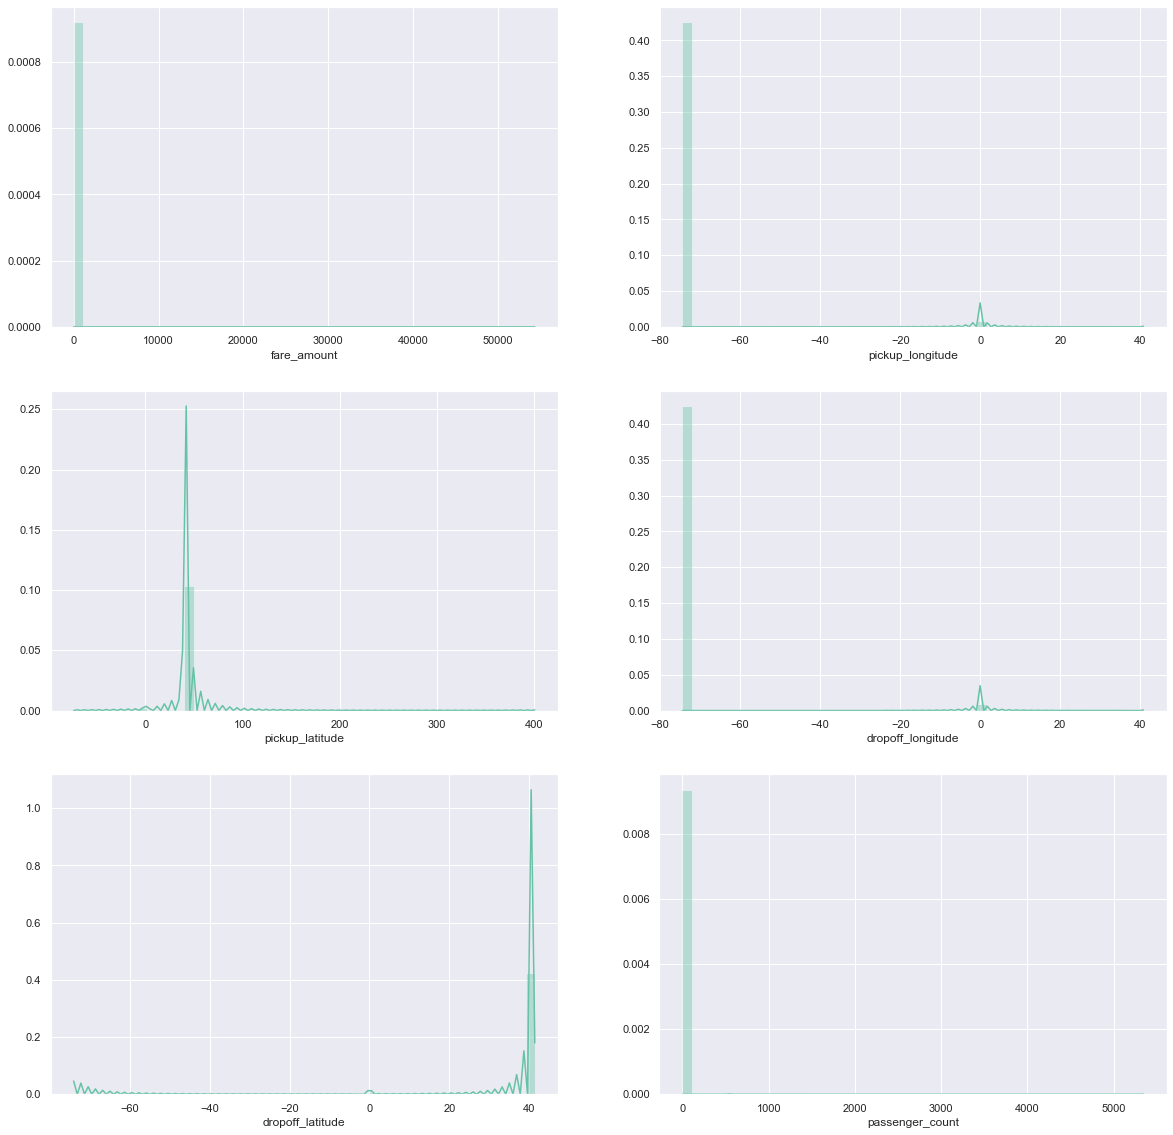

In [15]:
#histogram plots
plt.figure(figsize=(20,20))
plt.subplot(321)
_ = sns.distplot(train_cab['fare_amount'],bins=50)
plt.subplot(322)
_ = sns.distplot(train_cab['pickup_longitude'],bins=50)
plt.subplot(323)
_ = sns.distplot(train_cab['pickup_latitude'],bins=50)
plt.subplot(324)
_ = sns.distplot(train_cab['dropoff_longitude'],bins=50)
plt.subplot(325)
_ = sns.distplot(train_cab['dropoff_latitude'],bins=50)
plt.subplot(326)
_ = sns.distplot(train_cab['passenger_count'],bins=50)
plt.savefig('hist.png')
plt.show()

# missing value analysis in train_cab

In [16]:
#create dataframe with missing value percentage
#counting np.nan
missing_val=pd.DataFrame(train_cab.isnull().sum())
#reset index
missing_val=missing_val.reset_index()
missing_val.to_csv('miss_val.csv',index=False)
missing_val

,index,0
0,fare_amount,25
1,pickup_datetime,1
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [17]:
#remane variable
missing_val=missing_val.rename(columns={'index':'variable',0:"missing_percent"})
#calculate percentage
missing_val['missing_percent']=(missing_val['missing_percent']/len(train_cab))*100
#descending order missing value also chane the index as regular 
missing_val=missing_val.sort_values('missing_percent',ascending=False).reset_index(drop=True)
#missijng_val save the file in hard disk
missing_val.to_csv('miss_per.csv',index=False)
missing_val


,variable,missing_percent
0,passenger_count,0.342317
1,fare_amount,0.155598
2,pickup_datetime,0.006224
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


###Dealing with missing values in fare_amount

In [18]:
# dealing with nas in 1 st column
#actual value=10
#mean imputation=15.015317000186862
#median imputation=8.5
#knn imputation=10.06867
train_cab.fare_amount[100]
train_cab.fare_amount[100]=np.nan
train_cab.fare_amount.mean()
train_cab.fare_amount.median()
#checking knn imputation value
cabk=train_cab.drop('pickup_datetime',axis=1)
cabk=pd.DataFrame(KNN(k=5).fit_transform(cabk),columns=cabk.columns)
cabk.fare_amount[100]


C:\Users\My guest\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Imputing row 1/16067 with 0 missing, elapsed time: 38.169
Imputing row 101/16067 with 1 missing, elapsed time: 38.431
Imputing row 201/16067 with 0 missing, elapsed time: 38.437
Imputing row 301/16067 with 0 missing, elapsed time: 38.439
Imputing row 401/16067 with 0 missing, elapsed time: 38.441
Imputing row 501/16067 with 0 missing, elapsed time: 38.443
Imputing row 601/16067 with 0 missing, elapsed time: 38.445
Imputing row 701/16067 with 0 missing, elapsed time: 38.447
Imputing row 801/16067 with 0 missing, elapsed time: 38.448
Imputing row 901/16067 with 0 missing, elapsed time: 38.449
Imputing row 1001/16067 with 0 missing, elapsed time: 38.450
Imputing row 1101/16067 with 0 missing, elapsed time: 38.451
Imputing row 1201/16067 with 0 missing, elapsed time: 38.451
Imputing row 1301/16067 with 0 missing, elapsed time: 38.452
Imputing row 1401/16067 with 1 missing, elapsed time: 38.453
Imputing row 1501/16067 with 0 missing, elapsed time: 38.454
Imputing row 1601/16067 with 0 missi

10.068677622209403

In [19]:
sum(cabk.fare_amount!=0)

16066

In [20]:
cabk.loc[cabk.fare_amount<1]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,-2.90,-73.789450,40.643498,-73.788665,40.641952,1.0
2486,-2.50,-74.000031,40.720631,-73.999809,40.720539,1.0
2780,0.01,-73.939041,40.713963,-73.941673,40.713997,1.0
10002,0.00,-73.987115,40.738808,-74.005911,40.713960,1.0
13032,-3.00,-73.995062,40.740755,-73.995885,40.741357,4.0


In [21]:
#knn imputation is closest to actual value so 
train_cab.fare_amount=cabk.fare_amount


In [22]:
#check the imputed value
train_cab.fare_amount[100]

10.068677622209403

In [23]:
#check missing values left any
train_cab.fare_amount.isna().sum()

0

###Dealing with missing values in pickup_datetime column

In [24]:
#missing val analysis for 2nd column
train_cab.pickup_datetime.fillna(method='ffill',inplace=True)

In [25]:
#check it
train_cab.pickup_datetime.isna().sum()

0

## there are no missing values in pickup_longitude ,pickup_latitude,dropoff_longitude,dropoff_latitude

 ### dealing with np. nan  present in passenger_count

In [26]:
# missing val analysis for last column
#actual value=1
#mean imputation=2.6251714446318153
#median imputation=1
#knn imputation= 1.2073240237942406
train_cab.passenger_count[100]
train_cab.passenger_count[100]=np.nan
train_cab.passenger_count.mean()
train_cab.passenger_count.median()
cabk=train_cab.drop('pickup_datetime',axis=1)
cabk=pd.DataFrame(KNN(k=5).fit_transform(cabk),columns=cabk.columns)
cabk.passenger_count[100]


C:\Users\My guest\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Imputing row 1/16067 with 0 missing, elapsed time: 37.637
Imputing row 101/16067 with 1 missing, elapsed time: 37.639
Imputing row 201/16067 with 0 missing, elapsed time: 37.641
Imputing row 301/16067 with 0 missing, elapsed time: 37.642
Imputing row 401/16067 with 0 missing, elapsed time: 37.642
Imputing row 501/16067 with 0 missing, elapsed time: 37.644
Imputing row 601/16067 with 0 missing, elapsed time: 37.645
Imputing row 701/16067 with 0 missing, elapsed time: 37.646
Imputing row 801/16067 with 0 missing, elapsed time: 37.647
Imputing row 901/16067 with 0 missing, elapsed time: 37.648
Imputing row 1001/16067 with 0 missing, elapsed time: 37.649
Imputing row 1101/16067 with 0 missing, elapsed time: 37.649
Imputing row 1201/16067 with 0 missing, elapsed time: 37.649
Imputing row 1301/16067 with 0 missing, elapsed time: 37.650
Imputing row 1401/16067 with 1 missing, elapsed time: 37.651
Imputing row 1501/16067 with 0 missing, elapsed time: 37.652
Imputing row 1601/16067 with 0 missi

1.2073240237942406

In [27]:
# so median is close to the actual value
# median value is closet amon all method for fare_amount value
train_cab['passenger_count']=train_cab['passenger_count'].fillna(train_cab['passenger_count'].median())

In [28]:
train_cab.passenger_count[100]
train_cab.passenger_count.isna().sum()

0

In [29]:
#check for missing values in entire data set
train_cab.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

###### data train_cab is free from missing values

# OUTLIER ANALYSIS

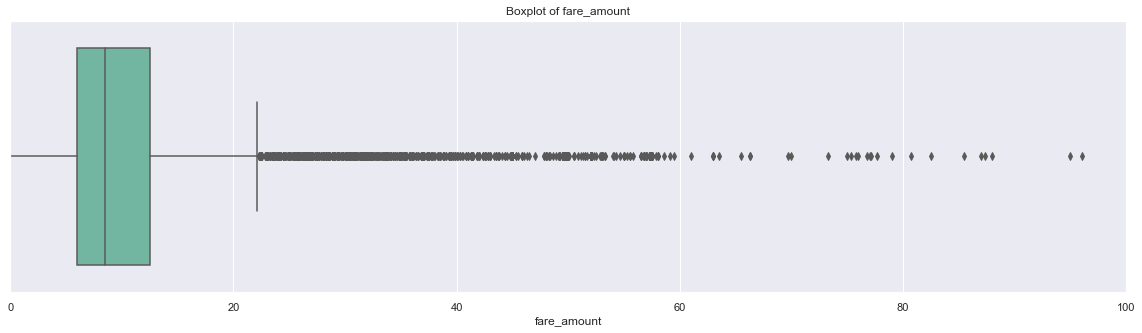

In [30]:
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=train_cab['fare_amount'],data=train_cab,orient='h')
plt.title('Boxplot of fare_amount')
plt.savefig('bp of fare_amount.png')
plt.show()

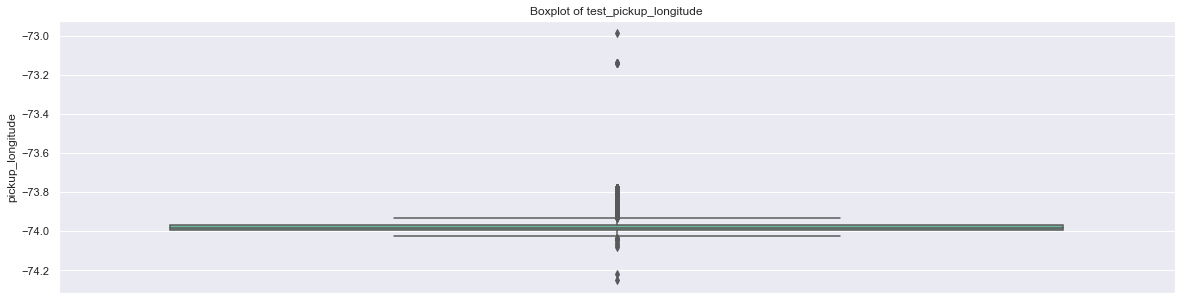

In [31]:
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=test_cab['pickup_longitude'],data=train_cab,orient='v')
plt.title('Boxplot of test_pickup_longitude')
plt.savefig('bp of test_pickup_longitude.png')
plt.show()

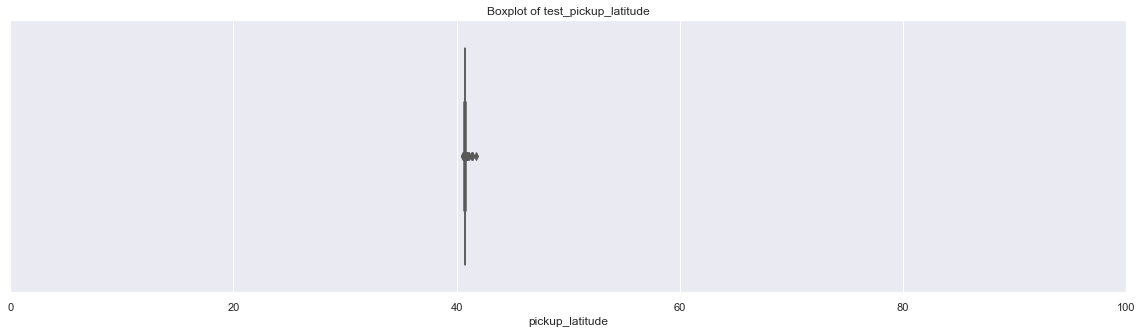

In [32]:
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=test_cab['pickup_latitude'],data=train_cab,orient='h')
plt.title('Boxplot of test_pickup_latitude')
plt.savefig('bp of test_pickup_latitude.png')
plt.show()

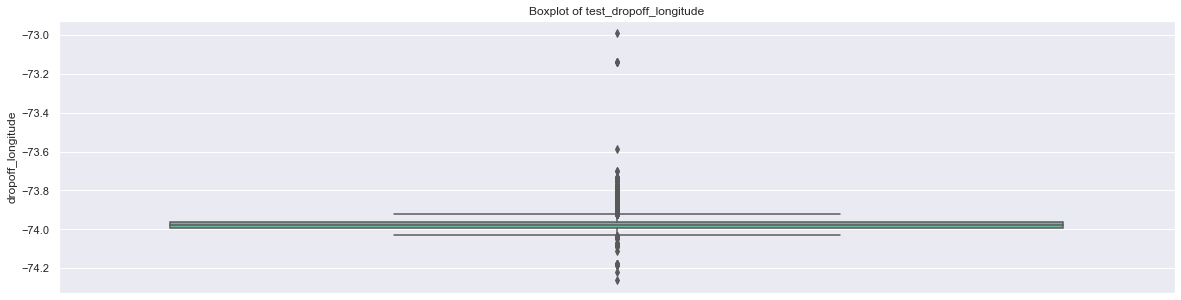

In [33]:
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=test_cab['dropoff_longitude'],data=train_cab,orient='v')
plt.title('Boxplot of test_dropoff_longitude')
plt.savefig('bp of test_dropoff_longitude.png')
plt.show()

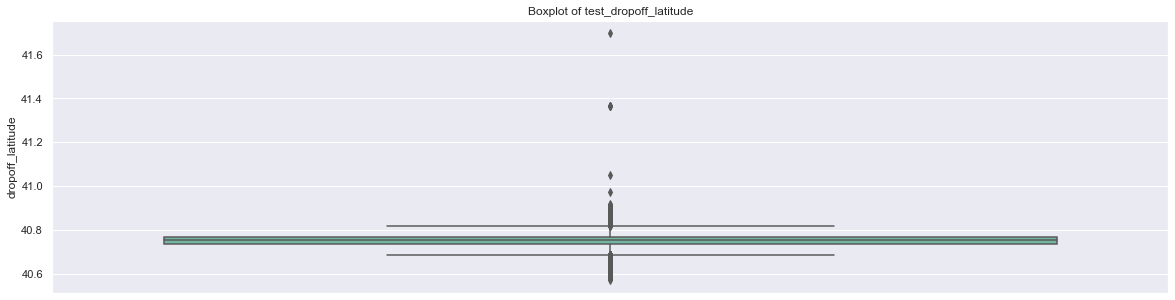

In [34]:
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=test_cab['dropoff_latitude'],data=train_cab,orient='v')
plt.title('Boxplot of test_dropoff_latitude')
plt.savefig('bp of test_dropoff_latgitude.png')
plt.show()

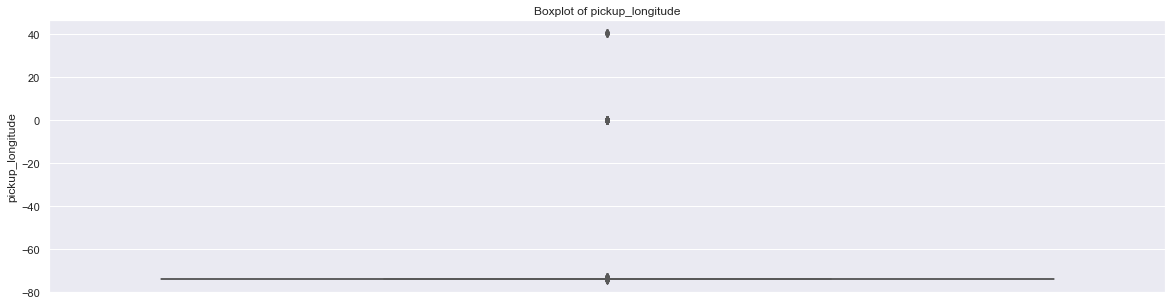

In [35]:
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=train_cab['pickup_longitude'],data=train_cab,orient='v')
plt.title('Boxplot of pickup_longitude')
plt.savefig('bp of pickup_longitude.png')
plt.show()

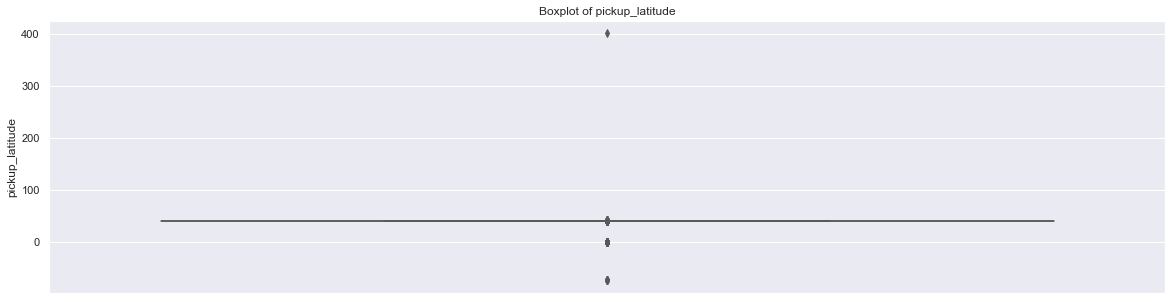

In [36]:
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=train_cab['pickup_latitude'],data=train_cab,orient='v')
plt.title('Boxplot of pickup_latitude')
plt.savefig('bp of pickup_latitude.png')
plt.show()

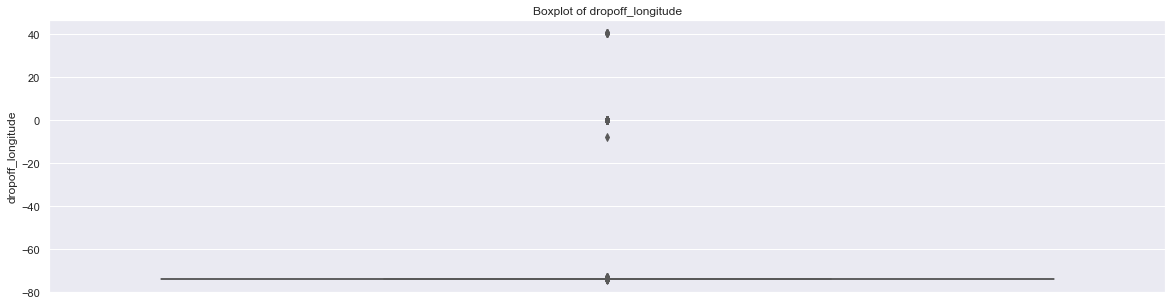

In [37]:
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=train_cab['dropoff_longitude'],data=train_cab,orient='v')
plt.title('Boxplot of dropoff_longitude')
plt.savefig('bp of dropoff_longitude.png')
plt.show()

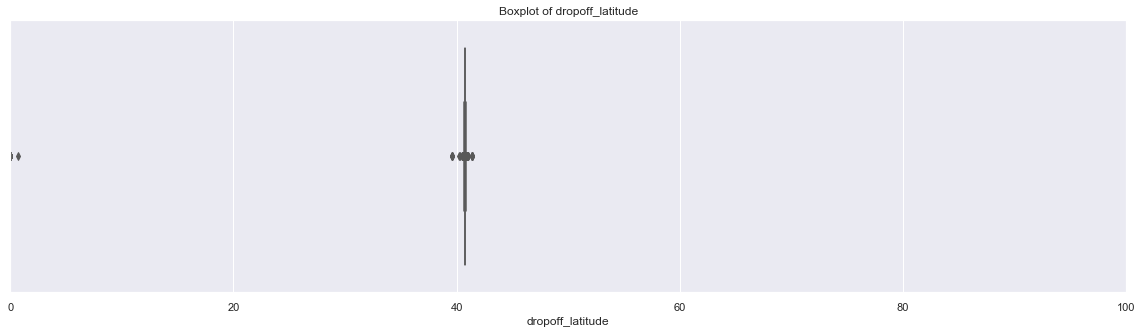

In [38]:
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=train_cab['dropoff_latitude'],data=train_cab,orient='h')
plt.title('Boxplot of dropoff_latitude')
#plt.savefig('bp of dropoff_latitude.png')
plt.show()

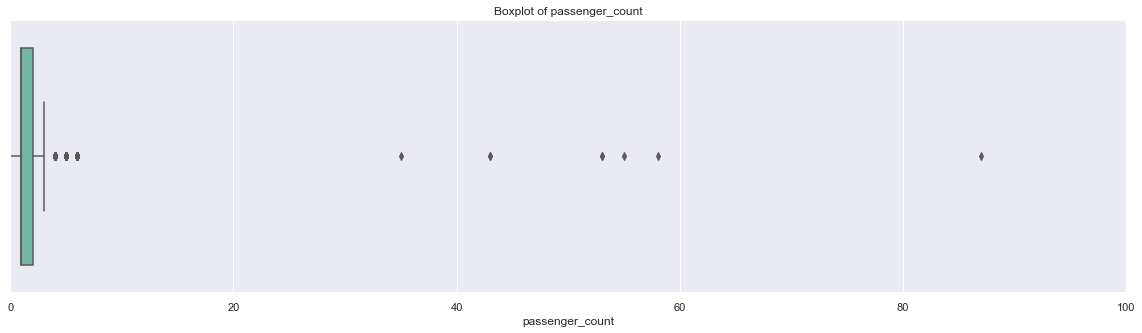

In [39]:
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=train_cab['passenger_count'],data=train_cab,orient='h')
plt.title('Boxplot of passenger_count')
#plt.savefig('bp of passenger_count.png')
plt.show()

In [40]:
#  outliers in column 1:fare_amount
q75=np.percentile(train_cab.fare_amount,75)
q25=np.percentile(train_cab.fare_amount,25)
iqr=q75-q25
min=q25-(iqr*1.5)
#since fare_amount can not go negative so we will keep the minimum  val= 0
min=0
max=q75+(iqr*1.5)
print(q75,q25,iqr,min,max)


12.5 6.0 6.5 0 22.25


In [41]:
len(train_cab.loc[train_cab['fare_amount'] < min])

3

In [42]:
len(train_cab.loc[train_cab['fare_amount']>max])

1399

In [43]:
train_cab.loc[train_cab['fare_amount'] < min,'fare_amount']

2039    -2.9
2486    -2.5
13032   -3.0
Name: fare_amount, dtype: float64

In [44]:
train_cab.loc[train_cab['fare_amount'] < min,'fare_amount'] =np.nan
train_cab.loc[train_cab['fare_amount'] > max,'fare_amount'] =np.nan

In [45]:
train_cab.loc[train_cab['fare_amount'] < min,'fare_amount']

Series([], Name: fare_amount, dtype: float64)

In [46]:
train_cab.fare_amount.isna().sum()
df=train_cab.drop('pickup_datetime',axis=1)
df=pd.DataFrame(KNN(k=5).fit_transform(df),columns=df.columns)
train_cab.fare_amount=df.fare_amount
train_cab.fare_amount.isna().sum()

Imputing row 1/16067 with 0 missing, elapsed time: 37.642
Imputing row 101/16067 with 0 missing, elapsed time: 37.643
Imputing row 201/16067 with 0 missing, elapsed time: 37.645
Imputing row 301/16067 with 0 missing, elapsed time: 37.646
Imputing row 401/16067 with 0 missing, elapsed time: 37.648
Imputing row 501/16067 with 0 missing, elapsed time: 37.649
Imputing row 601/16067 with 0 missing, elapsed time: 37.651
Imputing row 701/16067 with 0 missing, elapsed time: 37.652
Imputing row 801/16067 with 0 missing, elapsed time: 37.654
Imputing row 901/16067 with 0 missing, elapsed time: 37.655
Imputing row 1001/16067 with 0 missing, elapsed time: 37.657
Imputing row 1101/16067 with 0 missing, elapsed time: 37.658
Imputing row 1201/16067 with 0 missing, elapsed time: 37.660
Imputing row 1301/16067 with 0 missing, elapsed time: 37.661
Imputing row 1401/16067 with 0 missing, elapsed time: 37.662
Imputing row 1501/16067 with 0 missing, elapsed time: 37.664
Imputing row 1601/16067 with 0 missi

Imputing row 13801/16067 with 0 missing, elapsed time: 37.821
Imputing row 13901/16067 with 0 missing, elapsed time: 37.823
Imputing row 14001/16067 with 0 missing, elapsed time: 37.825
Imputing row 14101/16067 with 0 missing, elapsed time: 37.826
Imputing row 14201/16067 with 0 missing, elapsed time: 37.828
Imputing row 14301/16067 with 0 missing, elapsed time: 37.829
Imputing row 14401/16067 with 0 missing, elapsed time: 37.830
Imputing row 14501/16067 with 0 missing, elapsed time: 37.831
Imputing row 14601/16067 with 0 missing, elapsed time: 37.833
Imputing row 14701/16067 with 0 missing, elapsed time: 37.835
Imputing row 14801/16067 with 1 missing, elapsed time: 37.836
Imputing row 14901/16067 with 0 missing, elapsed time: 37.837
Imputing row 15001/16067 with 0 missing, elapsed time: 37.839
Imputing row 15101/16067 with 1 missing, elapsed time: 37.841
Imputing row 15201/16067 with 1 missing, elapsed time: 37.842
Imputing row 15301/16067 with 0 missing, elapsed time: 37.843
Imputing

0

In [47]:
(1399/16067)*100


8.707288230534637

In [48]:
train_cab.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.500000,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.900000,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.700000,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.700000,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.300000,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.100000,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.500000,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.500000,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1.0
8,6.144661,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.900000,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2.0


In [49]:
# outliers analysis for 3rd column
q75=np.percentile(train_cab.pickup_longitude,75)
q25=np.percentile(train_cab.pickup_longitude,25)
iqr=q75-q25
min=q25-(iqr*1.5)
max=q75+(iqr*1.5)
print(q75,q25,iqr,min,max)


-73.9668385 -73.992156 0.025317499999999882 -74.03013225 -73.92886225


In [50]:
len(train_cab.loc[train_cab['pickup_longitude'] < min])

19

In [51]:
len(train_cab.loc[train_cab['pickup_longitude']>max])

1095

In [52]:
train_cab.loc[train_cab['pickup_longitude'] < min,'pickup_longitude']

105     -74.035839
649     -74.438233
1335    -74.429332
1494    -74.105395
2346    -74.086412
4291    -74.031268
7096    -74.042958
7635    -74.102257
9090    -74.133710
9775    -74.039047
10524   -74.181602
11964   -74.089848
12173   -74.129877
12934   -74.076830
12940   -74.229138
13736   -74.064055
13756   -74.063010
13836   -74.072833
14136   -74.041883
Name: pickup_longitude, dtype: float64

In [53]:
train_cab.loc[train_cab['pickup_longitude'] < min,'pickup_longitude']=np.nan
train_cab.loc[train_cab['pickup_longitude'] > max,'pickup_longitude']=np.nan


In [54]:
train_cab.loc[train_cab['pickup_longitude'] < min,'pickup_longitude']

Series([], Name: pickup_longitude, dtype: float64)

In [55]:
train_cab.fare_amount.isna().sum()
df=train_cab.drop('pickup_datetime',axis=1)
df=pd.DataFrame(KNN(k=5).fit_transform(df),columns=df.columns)
train_cab.pickup_longitude=df.pickup_longitude
train_cab.pickup_longitude.isna().sum()

Imputing row 1/16067 with 1 missing, elapsed time: 42.943
Imputing row 101/16067 with 0 missing, elapsed time: 42.945
Imputing row 201/16067 with 0 missing, elapsed time: 42.946
Imputing row 301/16067 with 1 missing, elapsed time: 42.947
Imputing row 401/16067 with 0 missing, elapsed time: 42.949
Imputing row 501/16067 with 0 missing, elapsed time: 42.950
Imputing row 601/16067 with 0 missing, elapsed time: 42.951
Imputing row 701/16067 with 0 missing, elapsed time: 42.952
Imputing row 801/16067 with 0 missing, elapsed time: 42.953
Imputing row 901/16067 with 0 missing, elapsed time: 42.954
Imputing row 1001/16067 with 0 missing, elapsed time: 42.956
Imputing row 1101/16067 with 0 missing, elapsed time: 42.957
Imputing row 1201/16067 with 0 missing, elapsed time: 42.958
Imputing row 1301/16067 with 0 missing, elapsed time: 42.959
Imputing row 1401/16067 with 0 missing, elapsed time: 42.961
Imputing row 1501/16067 with 0 missing, elapsed time: 42.962
Imputing row 1601/16067 with 0 missi

Imputing row 15101/16067 with 0 missing, elapsed time: 43.121
Imputing row 15201/16067 with 0 missing, elapsed time: 43.122
Imputing row 15301/16067 with 0 missing, elapsed time: 43.124
Imputing row 15401/16067 with 1 missing, elapsed time: 43.125
Imputing row 15501/16067 with 0 missing, elapsed time: 43.126
Imputing row 15601/16067 with 1 missing, elapsed time: 43.128
Imputing row 15701/16067 with 0 missing, elapsed time: 43.129
Imputing row 15801/16067 with 0 missing, elapsed time: 43.130
Imputing row 15901/16067 with 1 missing, elapsed time: 43.131
Imputing row 16001/16067 with 0 missing, elapsed time: 43.132


0

In [56]:
#outlier analysis for test data  for pickup_longitude column
q75=np.percentile(test_cab.pickup_longitude,75)
q25=np.percentile(test_cab.pickup_longitude,25)
iqr=q75-q25
min=q25-(iqr*1.5)
max=q75+(iqr*1.5)
print(q75,q25,iqr,min,max)

test_cab.loc[test_cab['pickup_longitude'] < min,'pickup_longitude']=np.nan
test_cab.loc[test_cab['pickup_longitude'] > max,'pickup_longitude']=np.nan

test_cab.pickup_longitude.isna().sum()
df=test_cab.drop('pickup_datetime',axis=1)
df=pd.DataFrame(KNN(k=5).fit_transform(df),columns=df.columns)
test_cab.pickup_longitude=df.pickup_longitude
test_cab.pickup_longitude.isna().sum()


-73.96801325 -73.99250075 0.024487500000006435 -74.02923200000001 -73.93128199999998
Imputing row 1/9914 with 0 missing, elapsed time: 13.391
Imputing row 101/9914 with 0 missing, elapsed time: 13.393
Imputing row 201/9914 with 0 missing, elapsed time: 13.395
Imputing row 301/9914 with 0 missing, elapsed time: 13.396
Imputing row 401/9914 with 0 missing, elapsed time: 13.398
Imputing row 501/9914 with 0 missing, elapsed time: 13.400
Imputing row 601/9914 with 0 missing, elapsed time: 13.401
Imputing row 701/9914 with 0 missing, elapsed time: 13.402
Imputing row 801/9914 with 0 missing, elapsed time: 13.404
Imputing row 901/9914 with 0 missing, elapsed time: 13.405
Imputing row 1001/9914 with 0 missing, elapsed time: 13.407
Imputing row 1101/9914 with 0 missing, elapsed time: 13.408
Imputing row 1201/9914 with 0 missing, elapsed time: 13.410
Imputing row 1301/9914 with 0 missing, elapsed time: 13.412
Imputing row 1401/9914 with 0 missing, elapsed time: 13.414
Imputing row 1501/9914 with

0

In [57]:
#outlier analysis for test data  for pickup_latitude column
q75=np.percentile(test_cab.pickup_latitude,75)
q25=np.percentile(test_cab.pickup_latitude,25)
iqr=q75-q25
min=q25-(iqr*1.5)
max=q75+(iqr*1.5)
print(q75,q25,iqr,min,max)

test_cab.loc[test_cab['pickup_latitude'] < min,'pickup_latitude']=np.nan
test_cab.loc[test_cab['pickup_latitude'] > max,'pickup_latitude']=np.nan

test_cab.pickup_latitude.isna().sum()
df=test_cab.drop('pickup_datetime',axis=1)
df=pd.DataFrame(KNN(k=5).fit_transform(df),columns=df.columns)
test_cab.pickup_latitude=df.pickup_latitude
test_cab.pickup_latitude.isna().sum()


40.76711275 40.73612525 0.030987500000001944 40.689644 40.81359400000001
Imputing row 1/9914 with 0 missing, elapsed time: 14.684
Imputing row 101/9914 with 0 missing, elapsed time: 14.684
Imputing row 201/9914 with 0 missing, elapsed time: 14.685
Imputing row 301/9914 with 0 missing, elapsed time: 14.686
Imputing row 401/9914 with 0 missing, elapsed time: 14.687
Imputing row 501/9914 with 0 missing, elapsed time: 14.687
Imputing row 601/9914 with 0 missing, elapsed time: 14.688
Imputing row 701/9914 with 0 missing, elapsed time: 14.689
Imputing row 801/9914 with 0 missing, elapsed time: 14.689
Imputing row 901/9914 with 0 missing, elapsed time: 14.690
Imputing row 1001/9914 with 0 missing, elapsed time: 14.691
Imputing row 1101/9914 with 0 missing, elapsed time: 14.692
Imputing row 1201/9914 with 0 missing, elapsed time: 14.692
Imputing row 1301/9914 with 0 missing, elapsed time: 14.693
Imputing row 1401/9914 with 0 missing, elapsed time: 14.694
Imputing row 1501/9914 with 0 missing, 

0

In [58]:
#outlier analysis for test data  for dropoff_longitude column
q75=np.percentile(test_cab.dropoff_longitude,75)
q25=np.percentile(test_cab.dropoff_longitude,25)
iqr=q75-q25
min=q25-(iqr*1.5)
max=q75+(iqr*1.5)
print(q75,q25,iqr,min,max)

test_cab.loc[test_cab['dropoff_longitude'] < min,'dropoff_longitude']=np.nan
test_cab.loc[test_cab['dropoff_longitude'] > max,'dropoff_longitude']=np.nan

test_cab.dropoff_longitude.isna().sum()
df=test_cab.drop('pickup_datetime',axis=1)
df=pd.DataFrame(KNN(k=5).fit_transform(df),columns=df.columns)
test_cab.dropoff_longitude=df.dropoff_longitude
test_cab.dropoff_longitude.isna().sum()


-73.96405924999999 -73.99124675 0.0271875000000108 -74.03202800000003 -73.92327799999998
Imputing row 1/9914 with 0 missing, elapsed time: 13.112
Imputing row 101/9914 with 0 missing, elapsed time: 13.112
Imputing row 201/9914 with 0 missing, elapsed time: 13.113
Imputing row 301/9914 with 0 missing, elapsed time: 13.114
Imputing row 401/9914 with 0 missing, elapsed time: 13.115
Imputing row 501/9914 with 0 missing, elapsed time: 13.116
Imputing row 601/9914 with 0 missing, elapsed time: 13.117
Imputing row 701/9914 with 0 missing, elapsed time: 13.118
Imputing row 801/9914 with 0 missing, elapsed time: 13.118
Imputing row 901/9914 with 0 missing, elapsed time: 13.119
Imputing row 1001/9914 with 0 missing, elapsed time: 13.120
Imputing row 1101/9914 with 0 missing, elapsed time: 13.121
Imputing row 1201/9914 with 0 missing, elapsed time: 13.122
Imputing row 1301/9914 with 0 missing, elapsed time: 13.123
Imputing row 1401/9914 with 0 missing, elapsed time: 13.124
Imputing row 1501/9914 

0

In [59]:
#outlier analysis for test data  for dropoff_latitude column
q75=np.percentile(test_cab.dropoff_latitude,75)
q25=np.percentile(test_cab.dropoff_latitude,25)
iqr=q75-q25
min=q25-(iqr*1.5)
max=q75+(iqr*1.5)
print(q75,q25,iqr,min,max)

test_cab.loc[test_cab['dropoff_latitude'] < min,'dropoff_latitude']=np.nan
test_cab.loc[test_cab['dropoff_latitude'] > max,'dropoff_latitude']=np.nan

test_cab.dropoff_latitude.isna().sum()
df=test_cab.drop('pickup_datetime',axis=1)
df=pd.DataFrame(KNN(k=5).fit_transform(df),columns=df.columns)
test_cab.dropoff_latitude=df.dropoff_latitude
test_cab.dropoff_latitude.isna().sum()

40.76875725 40.735254499999996 0.0335027500000038 40.68500037499999 40.819011375
Imputing row 1/9914 with 0 missing, elapsed time: 13.109
Imputing row 101/9914 with 0 missing, elapsed time: 13.110
Imputing row 201/9914 with 0 missing, elapsed time: 13.111
Imputing row 301/9914 with 0 missing, elapsed time: 13.112
Imputing row 401/9914 with 0 missing, elapsed time: 13.112
Imputing row 501/9914 with 0 missing, elapsed time: 13.113
Imputing row 601/9914 with 0 missing, elapsed time: 13.114
Imputing row 701/9914 with 0 missing, elapsed time: 13.115
Imputing row 801/9914 with 0 missing, elapsed time: 13.116
Imputing row 901/9914 with 0 missing, elapsed time: 13.116
Imputing row 1001/9914 with 0 missing, elapsed time: 13.117
Imputing row 1101/9914 with 0 missing, elapsed time: 13.118
Imputing row 1201/9914 with 0 missing, elapsed time: 13.119
Imputing row 1301/9914 with 0 missing, elapsed time: 13.120
Imputing row 1401/9914 with 0 missing, elapsed time: 13.120
Imputing row 1501/9914 with 0 m

0

In [60]:
# removing outliers
q75=np.percentile(train_cab.pickup_latitude,75)
q25=np.percentile(train_cab.pickup_latitude,25)
iqr=q75-q25
min=q25-(iqr*1.5)
max=q75+(iqr*1.5)
print(q75,q25,iqr,min,max)

40.76738088 40.7349275 0.032453379999999754 40.686247429999995 40.816060949999994


In [61]:
len(train_cab.loc[train_cab['pickup_latitude'] < min])

705

In [62]:
len(train_cab.loc[train_cab['pickup_latitude']>max])

86

In [63]:
train_cab.loc[train_cab['pickup_latitude'] < min,'pickup_latitude']

11        0.000000
15        0.000000
26        0.000000
124       0.000000
131      40.676052
154      40.680558
192       0.000000
233       0.000000
251      40.647040
273       0.000000
286      40.645007
320      40.645265
354      40.682950
357       0.000000
376       0.000000
387       0.000000
437      40.643705
472       0.000000
498       0.000000
503      40.624708
510      40.644272
540       0.000000
542       0.000000
552      40.646382
568       0.000000
582      40.647295
616      40.657058
622      40.645412
660       0.000000
676      40.655194
           ...    
15422    40.645995
15490    40.638730
15495    40.644886
15508    40.643799
15517    40.641025
15551    40.648567
15599    40.644780
15648     0.000000
15665     0.000000
15699    40.676007
15703    40.646999
15710    40.645088
15743    40.646868
15764     0.000000
15783     0.000000
15795    40.646662
15809    40.681536
15895    40.647485
15900    40.644745
15906    40.616788
15911     0.000000
15919     0.

In [64]:
train_cab.loc[train_cab['pickup_latitude'] > max,'pickup_latitude']

84       40.828531
649      40.993260
836      40.818232
997      40.837712
1147     40.857380
1206     40.817698
1245     40.822925
1483     41.032490
1684     41.366138
1798     40.838981
1984     40.819957
2047     40.820032
2107     40.841443
2346     40.841982
2432     40.835497
2478     40.837120
2918     40.839893
3065     40.819887
3075     41.366138
3394     40.956018
3587     40.850443
3620     40.818771
3969     40.819690
3989     40.820277
4004     40.876747
4023     40.826708
4196     40.822327
4313     40.865160
4458     40.840073
4487     41.366138
           ...    
9474     40.820353
9506     40.825505
9704     40.825754
9808     41.366138
9840     40.835837
9877     40.828563
9921     40.822890
9927     40.850190
9960     40.840880
9992     40.818798
10688    41.366138
10834    40.820267
11021    40.826661
11187    41.035688
11366    40.866375
11463    40.858017
11834    40.821627
12224    40.835782
12268    40.816764
12841    40.817783
12934    40.876620
13101    40.

In [65]:
train_cab['pickup_latitude'].max()

401.083332

In [66]:
train_cab.loc[train_cab['pickup_latitude'] < min,'pickup_latitude']=np.nan
train_cab.loc[train_cab['pickup_latitude'] > max,'pickup_latitude']=np.nan
train_cab['pickup_latitude'].max()

40.815984

In [67]:
train_cab.loc[train_cab['pickup_latitude'] < min,'pickup_latitude']

Series([], Name: pickup_latitude, dtype: float64)

In [68]:
train_cab.fare_amount.isna().sum()
df=train_cab.drop('pickup_datetime',axis=1)
df=pd.DataFrame(KNN(k=5).fit_transform(df),columns=df.columns)
train_cab.pickup_latitude=df.pickup_latitude
train_cab.pickup_latitude.isna().sum()

Imputing row 1/16067 with 0 missing, elapsed time: 37.786
Imputing row 101/16067 with 0 missing, elapsed time: 37.788
Imputing row 201/16067 with 0 missing, elapsed time: 37.789
Imputing row 301/16067 with 0 missing, elapsed time: 37.790
Imputing row 401/16067 with 0 missing, elapsed time: 37.791
Imputing row 501/16067 with 0 missing, elapsed time: 37.792
Imputing row 601/16067 with 0 missing, elapsed time: 37.793
Imputing row 701/16067 with 0 missing, elapsed time: 37.794
Imputing row 801/16067 with 0 missing, elapsed time: 37.795
Imputing row 901/16067 with 0 missing, elapsed time: 37.796
Imputing row 1001/16067 with 0 missing, elapsed time: 37.797
Imputing row 1101/16067 with 0 missing, elapsed time: 37.798
Imputing row 1201/16067 with 0 missing, elapsed time: 37.799
Imputing row 1301/16067 with 0 missing, elapsed time: 37.799
Imputing row 1401/16067 with 0 missing, elapsed time: 37.800
Imputing row 1501/16067 with 0 missing, elapsed time: 37.801
Imputing row 1601/16067 with 0 missi

Imputing row 14401/16067 with 0 missing, elapsed time: 37.966
Imputing row 14501/16067 with 0 missing, elapsed time: 37.967
Imputing row 14601/16067 with 0 missing, elapsed time: 37.967
Imputing row 14701/16067 with 0 missing, elapsed time: 37.968
Imputing row 14801/16067 with 1 missing, elapsed time: 37.969
Imputing row 14901/16067 with 0 missing, elapsed time: 37.970
Imputing row 15001/16067 with 0 missing, elapsed time: 37.971
Imputing row 15101/16067 with 0 missing, elapsed time: 37.972
Imputing row 15201/16067 with 0 missing, elapsed time: 37.973
Imputing row 15301/16067 with 0 missing, elapsed time: 37.974
Imputing row 15401/16067 with 1 missing, elapsed time: 37.975
Imputing row 15501/16067 with 0 missing, elapsed time: 37.976
Imputing row 15601/16067 with 0 missing, elapsed time: 37.977
Imputing row 15701/16067 with 0 missing, elapsed time: 37.978
Imputing row 15801/16067 with 0 missing, elapsed time: 37.979
Imputing row 15901/16067 with 1 missing, elapsed time: 37.980
Imputing

0

In [69]:
# removing outliers
q75=np.percentile(train_cab.dropoff_latitude,75)
q25=np.percentile(train_cab.dropoff_latitude,25)
iqr=q75-q25
min=q25-(iqr*1.5)
max=q75+(iqr*1.5)
print(q75,q25,iqr,min,max)

40.768013499999995 40.734651 0.03336249999999552 40.684607250000006 40.81805724999999


In [70]:
len(train_cab.loc[train_cab['dropoff_latitude'] < min])

766

In [71]:
len(train_cab.loc[train_cab['dropoff_latitude'] > max])

241

In [72]:
train_cab['dropoff_latitude'].max()

41.366138

In [73]:

train_cab.loc[train_cab['dropoff_latitude'] < min,'dropoff_latitude']=np.nan
train_cab.loc[train_cab['dropoff_latitude'] > max,'dropoff_latitude']=np.nan

In [74]:
train_cab.fare_amount.isna().sum()
df=train_cab.drop('pickup_datetime',axis=1)
df=pd.DataFrame(KNN(k=5).fit_transform(df),columns=df.columns)
train_cab.dropoff_latitude=df.dropoff_latitude
train_cab.dropoff_latitude.isna().sum()

Imputing row 1/16067 with 0 missing, elapsed time: 39.731
Imputing row 101/16067 with 0 missing, elapsed time: 39.733
Imputing row 201/16067 with 0 missing, elapsed time: 39.735
Imputing row 301/16067 with 0 missing, elapsed time: 39.736
Imputing row 401/16067 with 0 missing, elapsed time: 39.737
Imputing row 501/16067 with 0 missing, elapsed time: 39.738
Imputing row 601/16067 with 0 missing, elapsed time: 39.740
Imputing row 701/16067 with 0 missing, elapsed time: 39.741
Imputing row 801/16067 with 0 missing, elapsed time: 39.742
Imputing row 901/16067 with 0 missing, elapsed time: 39.743
Imputing row 1001/16067 with 0 missing, elapsed time: 39.744
Imputing row 1101/16067 with 0 missing, elapsed time: 39.745
Imputing row 1201/16067 with 0 missing, elapsed time: 39.747
Imputing row 1301/16067 with 0 missing, elapsed time: 39.748
Imputing row 1401/16067 with 0 missing, elapsed time: 39.749
Imputing row 1501/16067 with 0 missing, elapsed time: 39.751
Imputing row 1601/16067 with 0 missi

0

In [75]:
# removing outliers
q75=np.percentile(train_cab.dropoff_longitude,75)
q25=np.percentile(train_cab.dropoff_longitude,25)
iqr=q75-q25
min=q25-(iqr*1.5)
max=q75+(iqr*1.5)
print(q75,q25,iqr,min,max)

-73.9636425 -73.991182 0.027539499999988948 -74.03249124999998 -73.92233325000002


In [76]:
len(train_cab.loc[train_cab['dropoff_longitude'] < min])

42

In [77]:
len(train_cab.loc[train_cab['dropoff_longitude'] > max])

1132

In [78]:
train_cab.loc[train_cab['dropoff_longitude'] < min,'dropoff_longitude']=np.nan
train_cab.loc[train_cab['dropoff_longitude'] > max,'dropoff_longitude']=np.nan

In [79]:
train_cab.loc[train_cab['dropoff_longitude'] < min,'dropoff_longitude']

Series([], Name: dropoff_longitude, dtype: float64)

In [80]:
train_cab.fare_amount.isna().sum()
df=train_cab.drop('pickup_datetime',axis=1)
df=pd.DataFrame(KNN(k=5).fit_transform(df),columns=df.columns)
train_cab.dropoff_longitude=df.dropoff_longitude
train_cab.dropoff_longitude.isna().sum()

Imputing row 1/16067 with 1 missing, elapsed time: 39.247
Imputing row 101/16067 with 0 missing, elapsed time: 39.250
Imputing row 201/16067 with 0 missing, elapsed time: 39.251
Imputing row 301/16067 with 1 missing, elapsed time: 39.253
Imputing row 401/16067 with 0 missing, elapsed time: 39.254
Imputing row 501/16067 with 0 missing, elapsed time: 39.256
Imputing row 601/16067 with 0 missing, elapsed time: 39.257
Imputing row 701/16067 with 0 missing, elapsed time: 39.259
Imputing row 801/16067 with 0 missing, elapsed time: 39.260
Imputing row 901/16067 with 0 missing, elapsed time: 39.261
Imputing row 1001/16067 with 0 missing, elapsed time: 39.262
Imputing row 1101/16067 with 0 missing, elapsed time: 39.264
Imputing row 1201/16067 with 0 missing, elapsed time: 39.265
Imputing row 1301/16067 with 0 missing, elapsed time: 39.266
Imputing row 1401/16067 with 0 missing, elapsed time: 39.267
Imputing row 1501/16067 with 0 missing, elapsed time: 39.268
Imputing row 1601/16067 with 0 missi

Imputing row 13801/16067 with 0 missing, elapsed time: 39.429
Imputing row 13901/16067 with 0 missing, elapsed time: 39.430
Imputing row 14001/16067 with 0 missing, elapsed time: 39.431
Imputing row 14101/16067 with 0 missing, elapsed time: 39.432
Imputing row 14201/16067 with 0 missing, elapsed time: 39.434
Imputing row 14301/16067 with 0 missing, elapsed time: 39.437
Imputing row 14401/16067 with 0 missing, elapsed time: 39.439
Imputing row 14501/16067 with 0 missing, elapsed time: 39.440
Imputing row 14601/16067 with 0 missing, elapsed time: 39.442
Imputing row 14701/16067 with 0 missing, elapsed time: 39.444
Imputing row 14801/16067 with 0 missing, elapsed time: 39.446
Imputing row 14901/16067 with 0 missing, elapsed time: 39.447
Imputing row 15001/16067 with 0 missing, elapsed time: 39.449
Imputing row 15101/16067 with 0 missing, elapsed time: 39.451
Imputing row 15201/16067 with 1 missing, elapsed time: 39.453
Imputing row 15301/16067 with 0 missing, elapsed time: 39.455
Imputing

0

In [81]:
# column 6 is a passenger count which is a categorical variable so and has values from 1to 6
min=1
max=6
len(train_cab.loc[train_cab['passenger_count'] < min])
len(train_cab.loc[train_cab['passenger_count'] >= max])
train_cab.loc[train_cab['passenger_count'] < min,'passenger_count']=np.nan
train_cab.loc[train_cab['passenger_count'] > max,'passenger_count']=np.nan
train_cab.passenger_count.describe()
train_cab['passenger_count']=train_cab['passenger_count'].fillna(train_cab['passenger_count'].median())
sum(train_cab.passenger_count.isna())

0

In [82]:
1132+42+241+766+86+705+1095+19+1399+3

5488

In [83]:
(5488/16067)*100


34.15696769776561

In [84]:
train_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16067 non-null float64
pickup_datetime      16067 non-null datetime64[ns, UTC]
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16067 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 878.7 KB


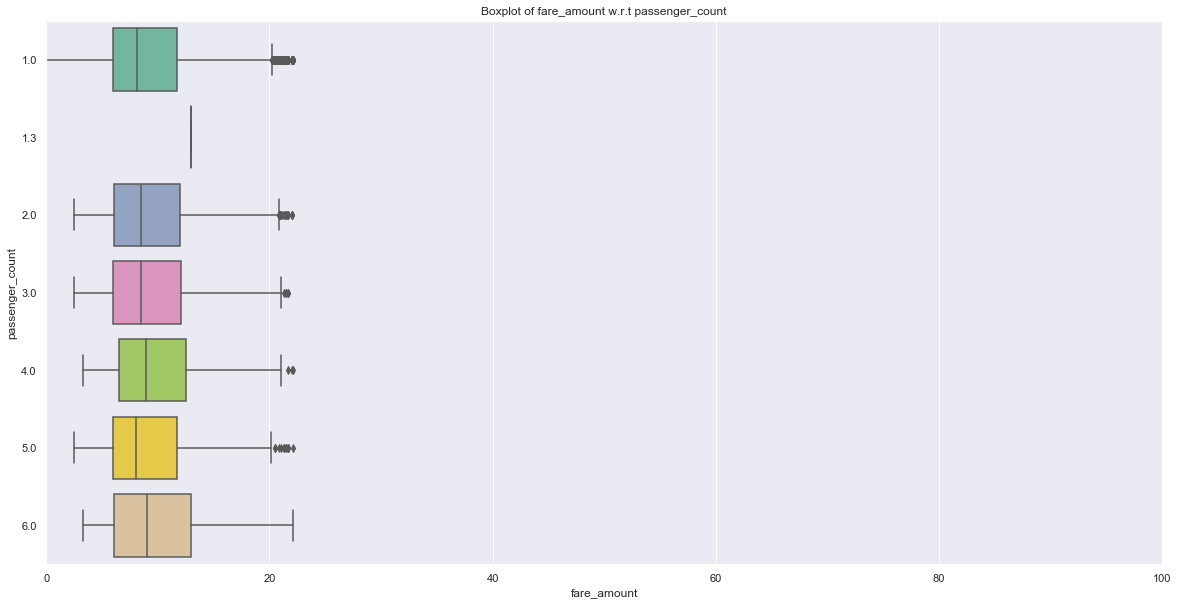

In [85]:

plt.figure(figsize=(20,10))
plt.xlim(0,100)
_ = sns.boxplot(x=train_cab['fare_amount'],y=train_cab['passenger_count'],data=train_cab,orient='h')
plt.title('Boxplot of fare_amount w.r.t passenger_count')
# plt.savefig('Boxplot of fare_amount w.r.t passenger_count.png')
plt.show()

In [86]:
train_cab.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16067.000000,16067.000000
mean,9.371804,-73.981394,40.752855,-73.979539,40.752869,1.644258
std,4.430996,0.016218,0.021784,0.017691,0.023169,1.262019
min,0.000000,-74.023050,40.686509,-74.032153,40.684702,1.000000
25%,6.000000,-73.992595,40.738460,-73.991400,40.738680,1.000000
50%,8.180000,-73.982333,40.754256,-73.981137,40.754462,1.000000
75%,11.804377,-73.971131,40.767502,-73.968517,40.767758,2.000000
max,22.100000,-73.929230,40.815984,-73.922377,40.817875,6.000000


In [87]:
test_cab.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.981509,40.752670,-73.978982,40.753223,1.671273
std,0.016387,0.021420,0.018328,0.023894,1.278747
min,-74.023050,40.689932,-74.030478,40.685062,1.000000
25%,-73.992819,40.737823,-73.991366,40.737757,1.000000
50%,-73.982805,40.753863,-73.980618,40.754981,1.000000
75%,-73.970710,40.767113,-73.967496,40.768865,2.000000
max,-73.931607,40.813253,-73.923325,40.818955,6.000000


In [88]:
#data is outlier and missing value free
train_cab.to_csv('ntrain_cab.csv',index=False)
test_cab.to_csv('ntest_cab.csv',index=False)

# feature engineering on latitude and longitude and on datetime variables

In [89]:
# for train_cab 
#train_cab['years']=train_cab.pickup_datetime.dt.year
#train_cab['months']=train_cab.pickup_datetime.dt.month
#train_cab['weekday']=train_cab.pickup_datetime.dt.weekday

In [90]:
# Calculate distance the cab travelled from pickup and dropoff location using great_circle from geopy library
data = [train_cab, test_cab]
for i in data:
    i['years']=i.pickup_datetime.dt.year
    i['months']=i.pickup_datetime.dt.month
    i['weekday']=i.pickup_datetime.dt.weekday
    i['great_circle']=i.apply(lambda x: great_circle((x['pickup_latitude'],x['pickup_longitude']),(x['dropoff_latitude'],x['dropoff_longitude'])).miles, axis=1)
    i['geodesic']=i.apply(lambda x: geodesic((x['pickup_latitude'],x['pickup_longitude']),(x['dropoff_latitude'],x['dropoff_longitude'])).miles, axis=1)

In [91]:
train_cab.head()
test_cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,years,months,weekday,great_circle,geodesic
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,1.443609,1.442197
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,1.507047,1.506080
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,5,0.384398,0.384120
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,5,1.218531,1.217683
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,5,3.347519,3.344737


In [92]:
# for test_cab 
##test_cab['years']=test_cab.pickup_datetime.dt.year
#test_cab['months']=test_cab.pickup_datetime.dt.month
#test_cab['weekday']=test_cab.pickup_datetime.dt.weekday


In [93]:
train_cab=train_cab.loc[:,['fare_amount', 'passenger_count', 'years',
       'months', 'weekday', 'geodesic']]
test_cab=test_cab.loc[:,['passenger_count', 'years',
       'months', 'weekday', 'geodesic']]

In [94]:
print(train_cab.head())
print(test_cab.head())

   fare_amount  passenger_count  years  months  weekday  geodesic
0          4.5              1.0   2009       6        0  0.825488
1         16.9              1.0   2010       1        1  5.246511
2          5.7              2.0   2011       8        3  0.863167
3          7.7              1.0   2012       4        5  1.737223
4          5.3              1.0   2010       3        1  1.241710
   passenger_count  years  months  weekday  geodesic
0                1   2015       1        1  1.442197
1                1   2015       1        1  1.506080
2                1   2011      10        5  0.384120
3                1   2012      12        5  1.217683
4                1   2012      12        5  3.344737


In [95]:
#data = [train_cab, test_cab]
#for i in data:
#    i['passenger_count']=i['passenger_count'].round().astype('object').astype('category',ordered=True)
#    i['years']=i['years'].round().astype('object').astype('category',ordered=False)
#    i['months']=i['months'].round().astype('object').astype('category',ordered=False)
#    i['weekday']=i['weekday'].round().astype('object').astype('category',ordered=False)

In [96]:
train_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 6 columns):
fare_amount        16067 non-null float64
passenger_count    16067 non-null float64
years              16067 non-null int64
months             16067 non-null int64
weekday            16067 non-null int64
geodesic           16067 non-null float64
dtypes: float64(3), int64(3)
memory usage: 753.2 KB


In [97]:
test_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 5 columns):
passenger_count    9914 non-null int64
years              9914 non-null int64
months             9914 non-null int64
weekday            9914 non-null int64
geodesic           9914 non-null float64
dtypes: float64(1), int64(4)
memory usage: 387.3 KB


In [98]:
#data is outlier and missing value free
train_cab.to_csv('nntrain_cab.csv',index=False)
test_cab.to_csv('nntest_cab.csv',index=False)

# implementing  model on the data

In [99]:
train_cab.head()

,fare_amount,passenger_count,years,months,weekday,geodesic
0,4.5,1.0,2009,6,0,0.825488
1,16.9,1.0,2010,1,1,5.246511
2,5.7,2.0,2011,8,3,0.863167
3,7.7,1.0,2012,4,5,1.737223
4,5.3,1.0,2010,3,1,1.241710


In [100]:
#split data
# divide the data
train,test=train_test_split(train_cab,test_size=0.2)

## linear regression

In [101]:
model=sm.OLS(train.iloc[:,0],train.iloc[:,1:7]).fit()

In [102]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                          2.930e+04
Date:                Thu, 14 Nov 2019   Prob (F-statistic):                        0.00
Time:                        21:31:31   Log-Likelihood:                         -32113.
No. Observations:               12853   AIC:                                  6.424e+04
Df Residuals:                   12848   BIC:                                  6.427e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
passenger_count     0.0210      0.021      1.015      0.310      -0.020       0.062
years               0.0023   4.07e-05     55.498      0.000       0.002       0.002
months              0.0292      0.008      3.880      0.000       0.014       0.044
weekday            -0.0211      0.013     -1.601      0.109      -0.047       0.005
geodesic            2.9672      0.023    127.360      0.000       2.921       3.013
==============================================================================
Omnibus:                     3392.559   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10670.886
Skew:                           1.348   Prob(JB):                         0.00
Kurtosis:                       6.558   Cond. No.                     1.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
prediction_lr=model.predict(test.iloc[:,1:7])

In [104]:
def MAPE(y_true,y_pred):
    mape = np.mean(np.abs((y_true-y_pred)/y_true))
    return mape

In [105]:
MAPE(test.iloc[:,0],prediction_lr)

0.2480631822270252

## decision tree

In [106]:
#decision tree for regression
fit_dt=DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,1:7],train.iloc[:,0])

In [107]:
#apply the model on test data
prediction_dt=fit_dt.predict(test.iloc[:,1:7])

In [108]:
# calculate mape
def MAPE(y_true,y_pred):
    mape=np.mean(np.abs((y_true-y_pred)/y_true))
    return mape

In [109]:
MAPE(test.iloc[:,0],prediction_dt)

0.2568809655936533

## random forest

In [110]:
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

In [111]:
# fit the regressor with x and y data 
fit_rf=regressor.fit(train.iloc[:,1:7],train.iloc[:,0])   

In [112]:
prediction_rf=fit_rf.predict(test.iloc[:,1:7])

In [113]:
# calculate mape
def MAPE(y_true,y_pred):
    mape=np.mean(np.abs((y_true-y_pred)/y_true))
    return mape

In [114]:
MAPE(test.iloc[:,0],prediction_rf)

0.24747241866276673

# since model selection

In [115]:
# since from mape error matrix we have 76% accuracy of linear regression mode
#75% of decision tree 
#82% of random forest
#so we will choose random forest as final model for deployment and hence use it in the test_cab.csv
#predicting the value
prediction_rf_test_cab=fit_rf.predict(test_cab)

In [121]:
prediction_rf_test_cab

array([ 8.90889402, 10.22898154,  4.63235117, ..., 12.65649454,
       18.43470723,  8.33300326])

In [123]:
reg_coef = reg_all.coef_
print(reg_coef)
# Plot the coefficients
plt.figure(figsize=(15,5))
plt.plot(range(len(test.columns)), reg_coef)
plt.xticks(range(len(test.columns)), test.columns.values, rotation=60)
plt.margins(0.02)
plt.savefig('linear coefficients')
plt.show()

NameError: name 'reg_all' is not defined

## data visualisation

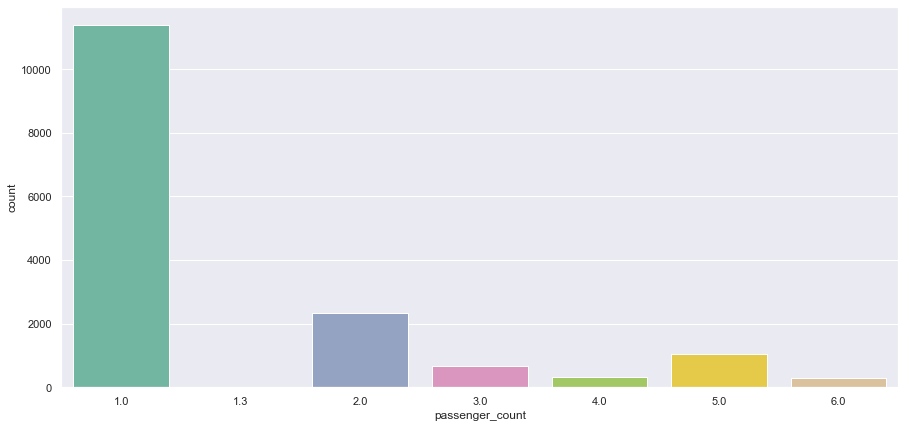

In [116]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train_cab)

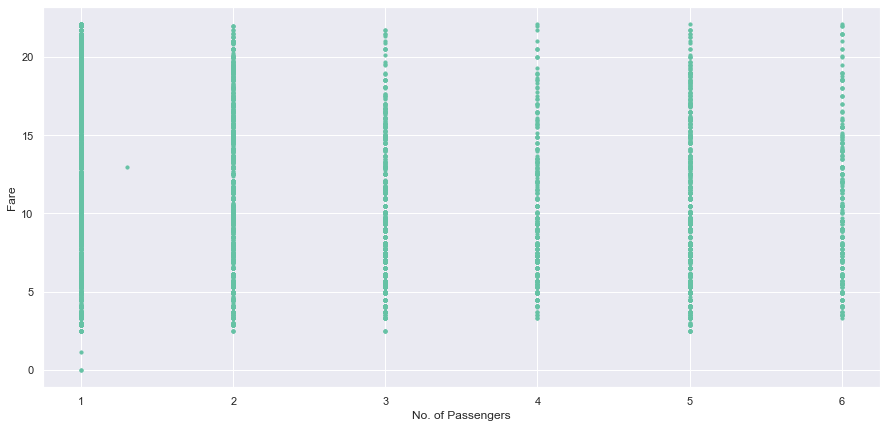

In [117]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_cab['passenger_count'], y=train_cab['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

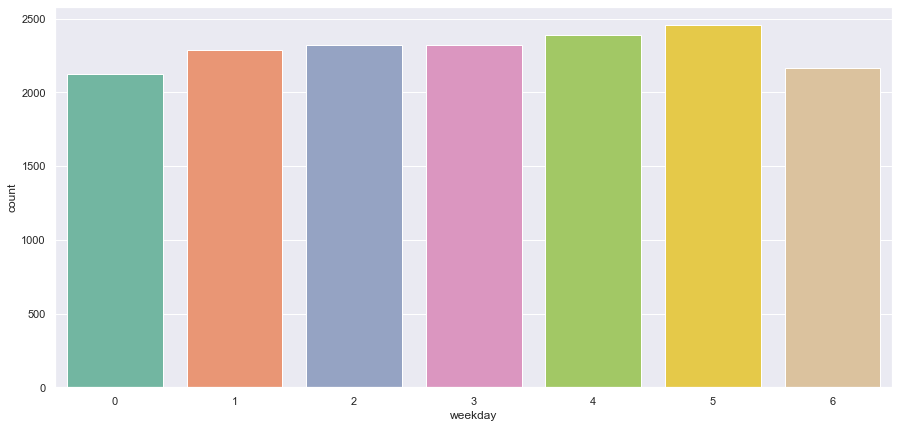

In [118]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="weekday", data=train_cab)

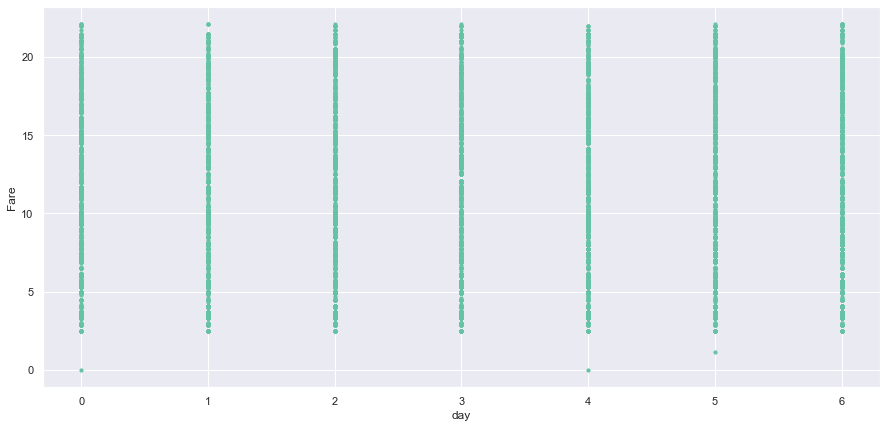

In [119]:

#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train_cab['weekday'], y=train_cab['fare_amount'], s=10)
plt.xlabel('day')
plt.ylabel('Fare')
plt.show()

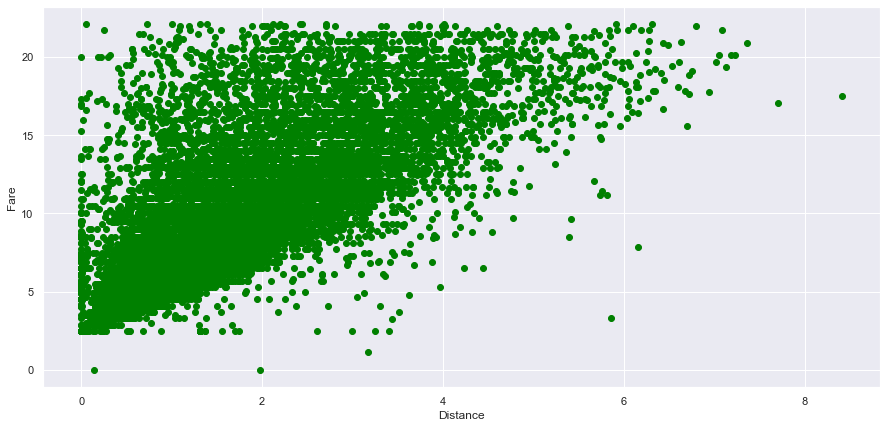

In [120]:
#Relationship between distance and fare 
plt.figure(figsize=(15,7))
plt.scatter(x = train_cab['geodesic'],y = train_cab['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()